# Scientific Python Tutorial for Dummies

In [179]:
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
# import scipy # pip install scipy
from matplotlib import pyplot as plt # pip install matplotlib
from scipy import signal

## Numpy
Work with matrices

Create matrix

In [66]:
m = np.array([1,2,3,4])
a = np.array([5,6,7,8])
ones = np.ones((10,1)) # create a matrix of ones of the given shape
zeros = np.zeros((20,1)) # create a matrix of zeros of the given shape

Perform Operations on matrices

In [67]:
print(m.reshape(2,2)) # reshape matrix to new dimension
print(np.concatenate([m,a], axis = 0)) # concatenation matrices
print(m*a) # element-wise multiplication similar to Matlab. Similar for division and addition
print(np.dot(m,a)) # dot product
print(np.matmul(m,a)) # matrix multiplication


[[1 2]
 [3 4]]
[1 2 3 4 5 6 7 8]
[ 5 12 21 32]
70
70


create an arbitary matrix, reshape

## Scipy - scientific functions
Probabily distributions, filters, MA models, Convolutions, Filters, Correlations -- Similar to Matlab or R, I believe. If not certain check docs.

In [68]:
a1 = np.random.randn(100,1) # random matrices are taken from numpy. However distributions are taken from scipy - check docs.
a2 = np.random.randn(100,1)
a_corr = signal.correlate(a1, a2) 
print(signal.correlate(a1, a2).shape)

(199, 1)


## Pandas - work with tabular data
If your data has strings, or you need operations similar to Excel -> Pandas. Have similar functions to numpy, scipy. Industry standard, used everywhere.

In [69]:
df = pd.DataFrame({'close':[0.1, 0.2, 0.3, 0.4], 'open': [0.0,0.1,0.2,0.3]})
print(df[0:3]) # slice your data Frame
print(df['close']) # slice your column
print(df.pop('close')) # pop your column - remove it from the data frame and return this column
print(df['open'])
print(df.drop(columns=['open'])) # drop your column - remove it from the dataframe and return the new dataframe

   close  open
0    0.1   0.0
1    0.2   0.1
2    0.3   0.2
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
0    0.0
1    0.1
2    0.2
3    0.3
Name: open, dtype: float64
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## Plot Graphs - use matplotlib

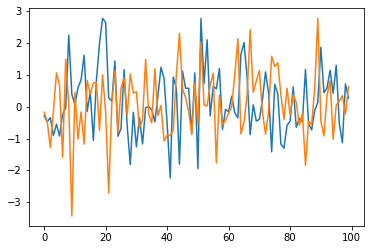

In [70]:
#  plot your noise
# simple plot
plt.plot(a1)
plt.plot(a2)

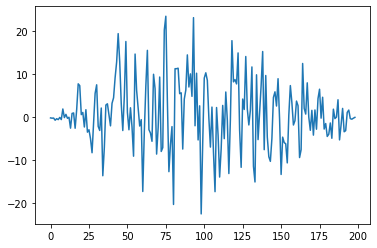

In [71]:
# advanced plot
# create figure and axis separately
plt.plot(a_corr)

## Generate Features - generate features
Use financial indicators from https://technical-analysis-library-in-python.readthedocs.io/en/latest/


In [6]:
# import financial indicators library
import ta
# load data from csv file
data = pd.read_csv('BTCUSDT_4h.csv')
# slice the last 400 data points
data = data[-400:]

In [86]:
data_ema = ta.trend.ema_indicator(data['close'])
# print data head first file datapoints
print(data_ema)

1611             NaN
1612             NaN
1613             NaN
1614             NaN
1615             NaN
            ...     
2006    56341.228097
2007    56497.436082
2008    56693.262839
2009    56863.587017
2010    56799.987476
Name: ema_12, Length: 400, dtype: float64


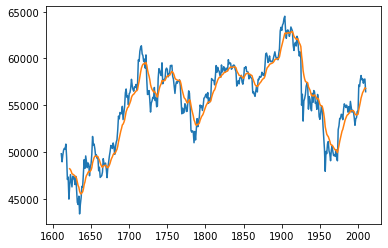

In [98]:
# plot data and data_ema
plt.plot(data['close'])
plt.plot(data_ema)

## Create and Test your signal system using Backtest - run your backtest

In [200]:
from backtest import Backtest, Random_Strategy


In [103]:
# random strategy
# Give it ticker get random signal
# signals
# -1 - Sell
# 0 - Idle
# 1 - Buy

class Random_Strategy:
    def __init__(self, *args, **kwargs):
        self._last_signal = None
    
    def get_signal(self,ticker):
        return np.random.randint(-1,2)

-0.0026316993884947237
269
Correlation: 0.6569111056944105


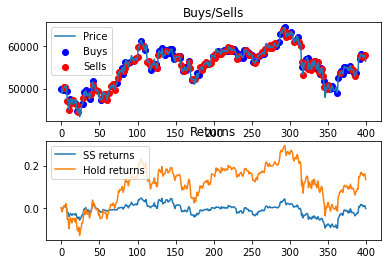

In [104]:
# create your backtest
balance_counter =  100
w1 = 1
bt = Backtest(balance_counter*w1, order_volume_prop=0.2)

# read your tickers
tickers = pd.read_csv('BTCUSDT_4h.csv')
#slice tickers 
tickers = tickers[-400:]
tickers = tickers.reset_index()
N = len(tickers)
random_strategy = Random_Strategy()


for i in range(N):
    # signal = signals[i]
    ticker = tickers.iloc[i]
    signal = random_strategy.get_signal(ticker)

    bt.run(ticker,signal)


print(bt.get_return())
print((bt.total_trades()))
# computes correlation between trading returns and hold
print('Correlation: {}'.format(bt.get_correlation()))
fig = bt.visualise()
plt.show()


## Machine Learning - Sklearn and XGBoost

In [180]:
import sklearn
from sklearn.ensemble import RandomForestRegressor


In [193]:
# prepare your data
# lets predict the next price from previous 10 prices and ema prices
# your X will be 10 close prices and 10 ema prices and your y will be the next price
data = pd.read_csv('BTCUSDT_4h.csv')
# print(len(data))
# slice the last 1500 points
data = data[-1500:]
prices = data['close'] # get close prices
prices_ema = ta.trend.ema_indicator(prices)
prices = pd.DataFrame(prices) # create DataFrame because prices was Series
prices['ema'] = prices_ema

prices = prices.dropna() # drop nans
# print(prices.head())

# prices

nb_prev_points = 10
# create target data
y = prices['close'][nb_prev_points:]
y = y.reset_index(drop=True)
# create input Data --- split your dataset in slices of nb_prev_points
# X = prices
X_columns = []
prices_columns = [X_columns.extend(["prev_price{}".format(nb_prev_points-i), "prev_ema{}".format(nb_prev_points-i)]) for i in range(nb_prev_points)]
# emas_columns = ["prev_ema{}".format(nb_prev_points-i) for i in range(nb_prev_points)]
# X_columns = prices_columns + emas_columns
N = len(y)
X = pd.DataFrame({}) # create empty dataframe
for i in range(N):
    prices_slice = prices[i:i+10].to_numpy()
    # prices_slice = np.concatenate([prices_slice[:,0],prices_slice[:,1]])
    # print(prices_slice.shape)
    df_tmp = pd.DataFrame(prices_slice.reshape(1,nb_prev_points*2), columns=X_columns)
    # print(df_tmp)
    X = pd.concat([X,df_tmp])
X = X.reset_index(drop=True)
# X.pop('index')
# print(X.head())
# verify that X length and Y lenth are the same
print(len(X))
print(len(y))

1479
1479


In [194]:
# do data preprocessing
# train, valid and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy(), test_size=0.2, shuffle=False)

# X_train_mean = (X_train.mean())
# X_train_std = (X_train.std())

# X_train = (X_train - X_train_mean)/X_train_std
# X_test = (X_test - X_train_mean)/X_train_std



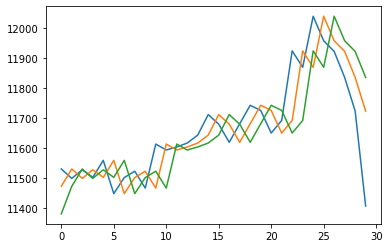

In [195]:
# visualise
plt.plot(X_train['prev_price1'][0:30])
plt.plot(X_train['prev_price2'][0:30])
plt.plot(X_train['prev_price3'][0:30])




In [185]:
# Define your ML model
regr = RandomForestRegressor(max_depth=4, random_state=0)

# train your random forest
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, random_state=0)

(0.802177938451534, 8.259598297946737e-68)


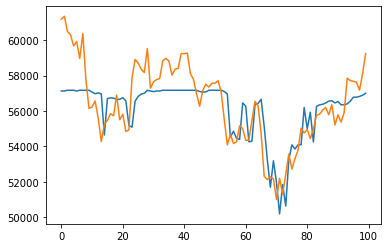

In [186]:
from scipy import stats 
y_pred = regr.predict(X_test)

plt.plot(y_pred[0:100])
plt.plot(y_test[0:100])
corr = stats.pearsonr(y_pred, y_test)
print(corr)


## Neural Networks - using PyTorch
Same as above we predict the next price from previous prices using neural networks

### Full-Connected ANN

In [187]:
import torch

In [188]:
# DEFINE DEVICE
##### For GPU #######
if torch.cuda.is_available():
    print('CUDA')
    device = torch.device("cuda")     
else:
    print('CPU')
    device = torch.device("cpu")

CUDA


In [190]:
# define neural network model
nb_inputs = 20
nb_outputs = 1
batch_size = 64
dtype = torch.float32
param = {
    'nb_inputs': nb_inputs,
    'nb_outputs': nb_outputs,
    'linear1_nb_hidden': 200,
    'linear2_nb_hidden': 100,
    # 'linear1_nb_hidden': ,
}
class LinearModel(torch.nn.Module):
    def __init__(self, param):
        super(LinearModel, self).__init__()
        self.linear1 = torch.nn.Linear(param['nb_inputs'], param['linear1_nb_hidden']).to(device) # (batch_size,20) -> (batch_size,linear1_nb_hidden)
        self.linear2 = torch.nn.Linear(param['linear1_nb_hidden'],param['linear2_nb_hidden']).to(device) # (batch_size,linear1_nb_hidden) -> (batch_size,linear2_nb_hidden)
        self.linear3 = torch.nn.Linear(param['linear2_nb_hidden'], param['nb_outputs']).to(device) # (batch_size,linear2_nb_hidden) -> (batch_size,nb_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x).squeeze()
        return x


x = torch.randn((batch_size, nb_inputs), device=device)
model = LinearModel(param)

print(model(x).shape)

total_params = 0
for p in model.parameters():
    total_params +=torch.prod(torch.tensor(p.shape))
    # print((p.shape))
print('Total Number params: {}'.format(total_params))

torch.Size([64])
Total Number params: 24401


In [191]:
# define Data Generator
def my_generator(X, y, batch_size):
    N = len(X)
    # idx = np.linspace(0,N,N)
    nb_batches = int(N//batch_size)
    for i in range(nb_batches):
        X_batch = torch.tensor(X[i:(i+1)*batch_size, :], device=device, dtype = dtype)
        y_batch = torch.tensor(y[i:(i+1)*batch_size], device=device, dtype = dtype)
        yield X_batch, y_batch
    
    

Text(0, 0.5, 'MSE')

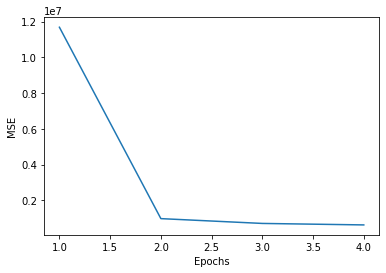

In [196]:
# train loop
batch_size = 64
nb_epochs = 4
# compile your model
model = LinearModel(param)
# define Loss function
loss_fn = torch.nn.MSELoss() 
# define optimiser
lr = 1e-3
optimizer = torch.optim.Adamax(model.parameters(), lr=lr,betas=(0.9,0.999))

# record losses for visualisation
loss_hist = []
for e in range(nb_epochs):
    # create list for losses
    local_loss = []
    for x_batch, y_batch in my_generator(X_train.to_numpy(), y_train, batch_size):
        # compute model prediction
        # print(x_batch.shape)
        output = model(x_batch)
        
        # compute loss
        loss_val = loss_fn(output, y_batch)
        # reset optimiser gradients to zero
        optimizer.zero_grad()
        # compute gradients
        loss_val.backward()
        # perform weights update
        optimizer.step()
        # add loss to local losses
        local_loss.append(loss_val.item())
    
    # compute mean loss for this epoch
    mean_loss = np.mean(local_loss)
    # add mean loss to loss hist
    loss_hist.append(mean_loss)

plt.close()
plt.plot(np.arange(1,nb_epochs+1),np.array(loss_hist).T)
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [197]:
# test Loop correlation
y_pred = model(torch.tensor(X_test.to_numpy(), device=device, dtype=dtype))
y_pred = y_pred.cpu().detach().numpy()

corr = stats.pearsonr(y_pred, y_test)
print(corr)



(0.8610093982425434, 2.533827196206792e-88)


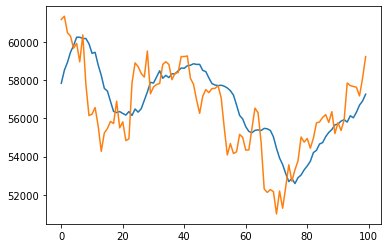

In [198]:
# plot predicted test sample 
y_pred = model(torch.tensor(X_test.to_numpy(), device=device, dtype=dtype))
y_pred = y_pred.cpu().detach().numpy()
plt.plot(y_pred[0:100])
plt.plot(y_test[0:100])

### Recurrent Neural Networks

### LSTM

## Create a Strategy which uses Machine Learning

In [266]:
class MLStrategy():
    def __init__(self, model, nn=False, nb_prices = 30) -> None:
        # save your model
        self.model = model
        self.prev_price = None
        self.prev_prices = []
        self.X = pd.DataFrame({})
        self.nn = nn
        self.nb_prices = nb_prices
        
    def get_signal(self, ticker):
        # idle for the first iteration
        # if self.prev_price == None:
        #     self.prev_price = ticker['prev_price1']
        #     self.prev_prices.append(ticker['prev_price1'])
        #     return 0
        price = ticker['close']
        # print(price)

        # update inputs for your model
        if len(self.prev_prices) < self.nb_prices:
            # self.X['close'] = pd.concat([X['close'], price])
            # print('Trigger')
            self.prev_prices.append(price)
            # print(self.prev_prices)
            self.prev_price = ticker['close']
            return 0 # Idle
        else:
            # self.X['close'] = pd.concat([X['close'][1:], price])
            # self.X['ema'] = ta.trend.ema_indicator(X['close'])
            # print(self.prev_prices)
            self.prev_prices = self.prev_prices[1:] + [price]
            # print(self.prev_prices)
            self.X['close'] = self.prev_prices
            self.X['ema'] = ta.trend.ema_indicator(self.X['close'])

        
        # print('Previous prices are')
        # print(self.X)
        # take previous 10 prices
        X_in = self.X[-10:]
        # print(X_in.to_numpy().reshape(1,20))
        if self.nn:
            X_in = X_in.to_numpy().reshape(1,20) # get matrix data
            X_in = torch.tensor(X_in, device=device, dtype=dtype) # create torch tensor
            pred_price =self.model(X_in).item()
        else:
            pred_price = self.model.predict(X_in.to_numpy().reshape(1,20))

        # print(pred_price - self.prev_price)
        if pred_price > 1.02*self.prev_price:
            # if price will go up by more than 10 per cent => buy
            self.prev_price = ticker['close']
            return 1

        elif pred_price < 0.98*self.prev_price:
            # if price will be lower by more than 10 percent => sell
            self.prev_price = ticker['close']
            return -1
        
        else:
            # do nothing => Idle
            self.prev_price = ticker['close']
            return 0


-0.017497242363210434
70
Correlation: 0.9108371854134565


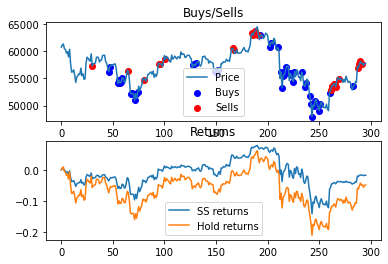

In [267]:
# Test your ML strategy
# create your backtest
balance_counter =  100
w1 = 1
bt = Backtest(balance_counter*w1, order_volume_prop=0.2)

# read your tickers
# tickers = pd.read_csv('BTCUSDT_4h.csv')
#slice tickers 
# tickers = tickers[-400:]
# tickers = tickers.reset_index()

tickers = pd.DataFrame({})
tickers['close'] = X_test['prev_price1']
N = len(tickers)
ml_strategy = MLStrategy(model, nn=True)
# random_strategy = Random_Strategy()


for i in range(N):
    # signal = signals[i]
    ticker = tickers.iloc[i]
    # print(ticker)
    signal = ml_strategy.get_signal(ticker)
    # print(signal)
    bt.run(ticker,signal)


print(bt.get_return())
print((bt.total_trades()))
# computes correlation between trading returns and hold
print('Correlation: {}'.format(bt.get_correlation()))
fig = bt.visualise()
plt.show()
